# <center> <img src="figs/logo_facens.png" alt="Logo Facens" width="110" align="left"/>  <br/> <center>Facens<br/>
</p>

<br/>
  
<font size="3"><center>Prof. Julio Cesar Mastrodomenico</center></font>




# Aprendizado de Máquinas
### 2022PGS2M1
----

## <center> Máquina de Vetor de Suporte </center>

Implementação e utilização da Máquina de Vetor de Suporte ou Support Vector Machine

<img src="figs/SVM_margin.png" width="250" height="250" />

Banco de dados:
- Social Ads Network
- Iris
- Data3
- Digits
- Breast Cancer

### Exercícios

## 1) Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, \
                            f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets
import random
from sklearn.pipeline import Pipeline
from glob import glob
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA

# Nossos Algoritmos
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

## 2) Primeiro exercício e visualização da superfície de decisão
-----------------------

### Kernel Linear

In [3]:
# Exercicio com o dataset 2D, Social Network Ads
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [7]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [8]:
y_pred = classifier.predict(X_test)

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[66  2]
 [ 8 24]]


0.9

### Visualização

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


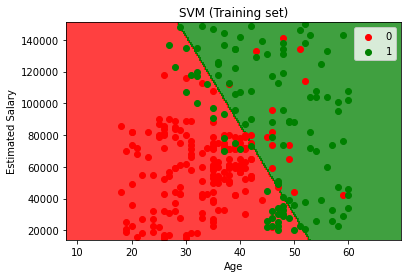

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


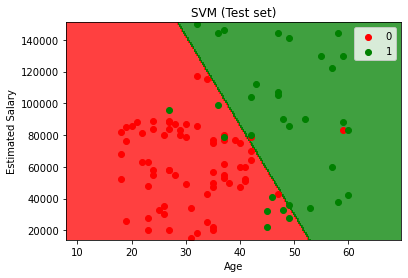

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Kernel RBF

In [10]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [11]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [12]:
y_pred = classifier.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

### Visualização:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


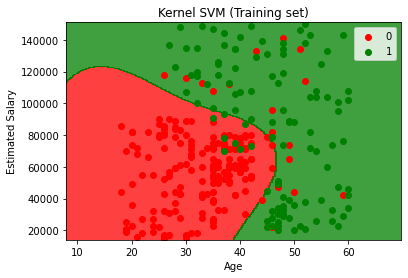

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


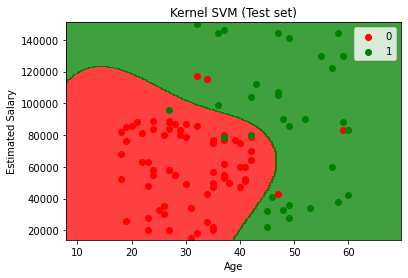

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Kernel Polinomial

In [18]:
classifier = SVC(kernel = 'poly', degree=9,random_state = 0)
classifier.fit(X_train, y_train)

SVC(degree=9, kernel='poly', random_state=0)

In [19]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [20]:
y_pred = classifier.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [13 19]]


0.84

### Visualização

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


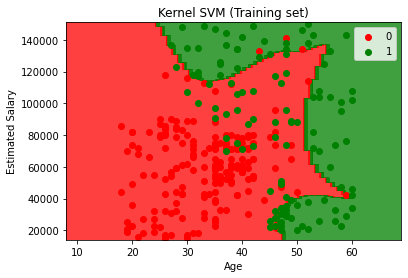

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1.),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1.))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


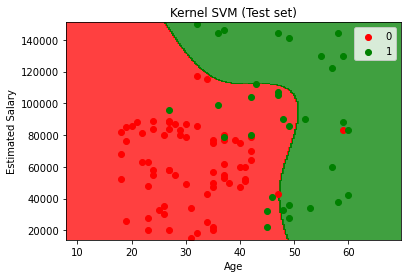

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 3) Iris Dataset

In [23]:
# Importa o dataset do Iris direto do sklearn
loadiris = datasets.load_iris(as_frame=True)
df_iris = pd.concat((pd.DataFrame(loadiris.data),pd.DataFrame(loadiris.target)), axis=1)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


In [24]:
# Visualizando nosso Dataset
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
df_iris['target'] = df_iris['target'].apply(lambda x: 1 if x == 1 or x == 2 else 0)

In [26]:
df_iris['target'].value_counts()

1    100
0     50
Name: target, dtype: int64

In [27]:
# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_iris.iloc[:, 0:-1].values

# pega os valores da última coluna e guarda em um vetor Y
Y = df_iris.iloc[:, -1].values

# imprime as 5 primeiras linhas da matriz X
print('X:', X[0:5,:])

# imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Y: [0 0 0 0 0]


### Aplicando o PCA

In [28]:
# Normalização dos dados por padronização
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [29]:
# Aplicando o PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [30]:
# Dividindo em Train Test
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=0)

In [31]:
X_train

array([[ 1.3462921 ,  0.42243061],
       [ 0.22397877, -0.28777351],
       [-2.16857717,  0.52714953],
       [ 1.02095055,  0.06434603],
       [ 1.86270322, -0.17854949],
       [ 0.01142619, -1.03401828],
       [-1.898572  ,  1.40501879],
       [ 1.06109461, -0.63384324],
       [ 0.44069345, -0.06329519],
       [ 0.33653037, -0.98840402],
       [ 1.8839007 ,  0.41924965],
       [-2.36422905, -0.34190802],
       [ 1.90178409,  0.68957549],
       [-1.96444768,  0.47232667],
       [-2.1663101 ,  1.04369065],
       [-0.11019628, -2.65407282],
       [ 1.47143146,  0.25562182],
       [ 1.9981471 ,  1.04916875],
       [ 1.26376667, -1.70674538],
       [ 2.00668647, -0.71143865],
       [ 0.1649179 , -1.30260923],
       [ 2.79877045,  0.85680333],
       [ 0.74652974,  0.77301931],
       [ 0.13079518, -1.56227183],
       [ 1.33323218, -0.48181122],
       [ 1.11414774, -0.29292262],
       [ 0.36701769, -1.56150289],
       [ 1.56458048, -0.89668681],
       [ 1.10178118,

In [51]:
# Instânciando nosso SVM
classifier = SVC(kernel='linear', random_state=0, C=10)
classifier.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=0)

In [52]:
# Verificando a metrica
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[11  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualização dos Vetores de Suporte

In [53]:
classifier.support_vectors_

array([[-1.85812246, -2.33741516],
       [-1.81866953,  0.08555853],
       [-0.48732274, -1.85242909]])

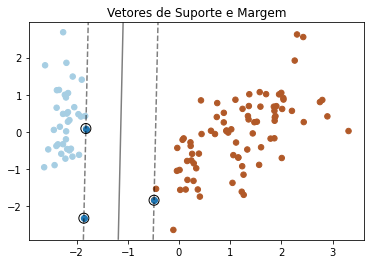

In [54]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.scatter(classifier.support_vectors_[:,0],classifier.support_vectors_[:,1])

# PLot da função de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Grid para visualizar as margens
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# Plot das margens e decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Plot dos vetores de suporte
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Vetores de Suporte e Margem')
plt.show()

In [56]:
# Realizar a mesma visualização com diferentes kernels
# Instânciando nosso SVM
classifier = SVC(kernel='poly', degree= 12,random_state=0)
classifier.fit(X_train, y_train)

SVC(degree=12, kernel='poly', random_state=0)

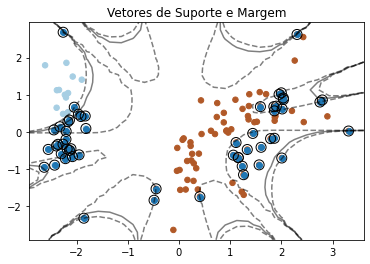

In [57]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.scatter(classifier.support_vectors_[:,0],classifier.support_vectors_[:,1])

# PLot da função de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Grid para visualizar as margens
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# Plot das margens e decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Plot dos vetores de suporte
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Vetores de Suporte e Margem')
plt.show()

In [58]:
classifier.support_vectors_

array([[-2.36422905, -0.34190802],
       [-1.96444768,  0.47232667],
       [-2.14012214, -0.50454069],
       [-2.6331007 , -0.96150673],
       [-1.914323  ,  0.40885571],
       [-2.26221453,  2.68628449],
       [-2.29938422, -0.59739451],
       [-2.44402884,  0.0476442 ],
       [-2.2184509 , -0.72867617],
       [-2.32613087,  0.13307834],
       [-1.85812246, -2.33741516],
       [-2.08096115, -0.67413356],
       [-2.5536384 , -0.47910069],
       [-2.42963258, -0.90418004],
       [-2.10997488, -0.46020184],
       [-2.13956345,  0.31321781],
       [-2.2078089 , -0.2061074 ],
       [-1.81866953,  0.08555853],
       [-1.83159477,  0.42369507],
       [-2.26526149, -0.3377319 ],
       [-2.20383344,  0.00921636],
       [-1.95184633, -0.62561859],
       [-2.16971071,  0.26887896],
       [-2.04514621,  0.66155811],
       [-2.18432817, -0.46901356],
       [-2.39437631, -0.38624687],
       [ 1.86270322, -0.17854949],
       [ 1.06109461, -0.63384324],
       [ 1.90178409,

### Grid Search

* Linear - Param C
* RBF - Param Gamma
* Poly - Param Degree

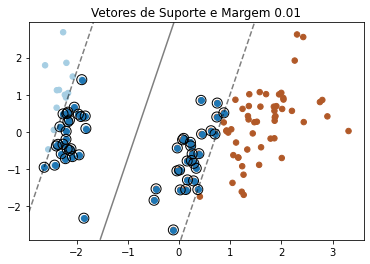

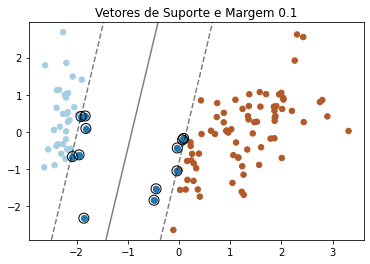

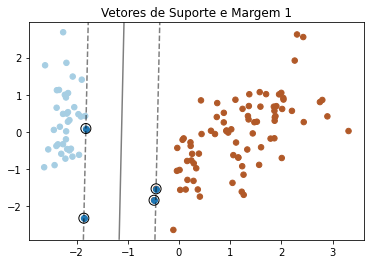

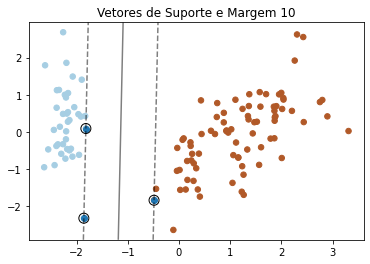

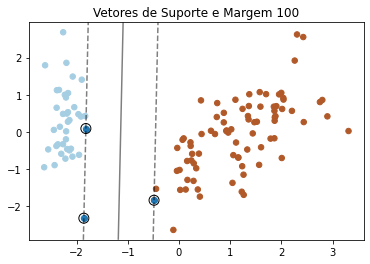

In [59]:
# Um meio de se testar os parametros
C_range = [0.01, 0.1, 1, 10, 100]
acc_score = []
for c in C_range:
    svc = SVC(kernel='linear', C=c).fit(X_train, y_train)
    acc_score.append([c, svc.score(X_test, y_test)])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

    # PLot da função de decisão
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Grid para visualizar as margens
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)

    # Plot das margens e decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Plot dos vetores de suporte
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title('Vetores de Suporte e Margem ' + str(c))
    plt.show()

In [60]:
acc_score

[[0.01, 1.0], [0.1, 1.0], [1, 1.0], [10, 1.0], [100, 1.0]]

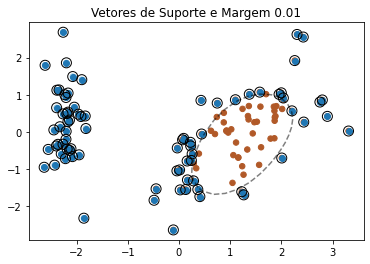

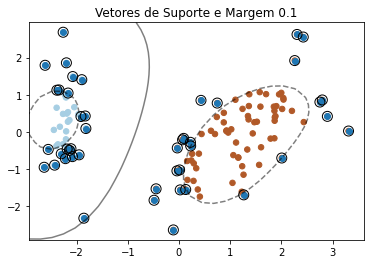

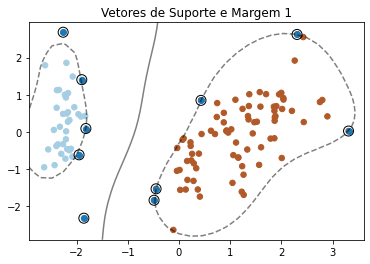

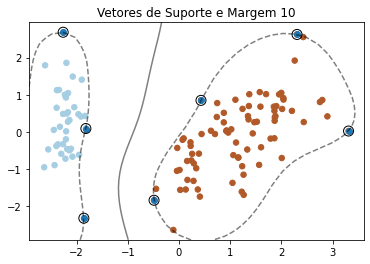

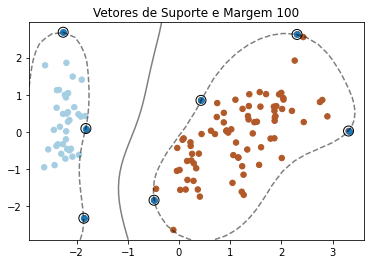

In [63]:
# Verificar a separação com diferentes parâmetros de degrees para polinômio e gamma para o RBF
# Um meio de se testar os parametros
C_range = [0.01, 0.1, 1, 10, 100]
acc_score = []
for c in C_range:
    svc = SVC(kernel='rbf', C=c).fit(X_train, y_train)
    acc_score.append([c, svc.score(X_test, y_test)])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

    # PLot da função de decisão
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Grid para visualizar as margens
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)

    # Plot das margens e decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Plot dos vetores de suporte
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title('Vetores de Suporte e Margem ' + str(c))
    plt.show()

In [64]:
acc_score

[[0.01, 0.6333333333333333], [0.1, 1.0], [1, 1.0], [10, 1.0], [100, 1.0]]

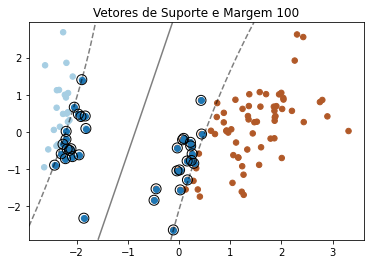

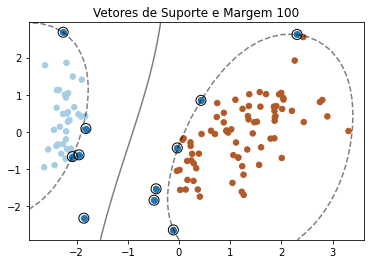

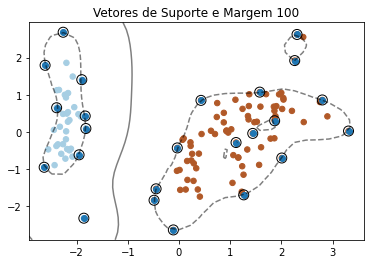

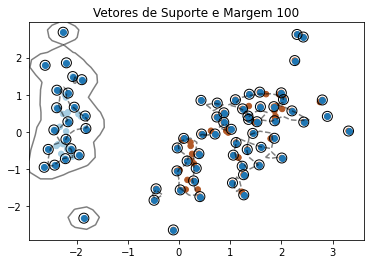

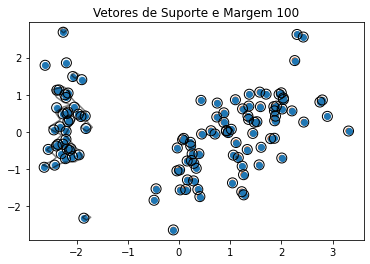

In [67]:
# Um meio de se testar os parametros
G_range = [0.01, 0.1, 1, 10, 100]
acc_score = []
for g in G_range:
    svc = SVC(kernel='rbf', gamma=g).fit(X_train, y_train)
    acc_score.append([g, svc.score(X_test, y_test)])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

    # PLot da função de decisão
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Grid para visualizar as margens
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)

    # Plot das margens e decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Plot dos vetores de suporte
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title('Vetores de Suporte e Margem ' + str(c))
    plt.show()

In [68]:
acc_score

[[0.01, 1.0],
 [0.1, 1.0],
 [1, 1.0],
 [10, 0.9666666666666667],
 [100, 0.7666666666666667]]

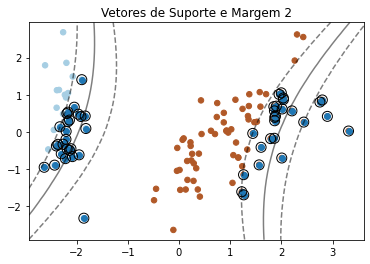

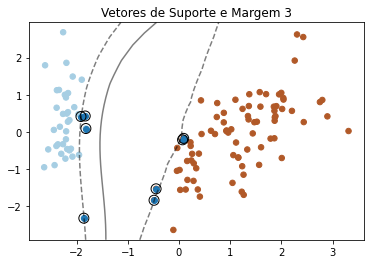

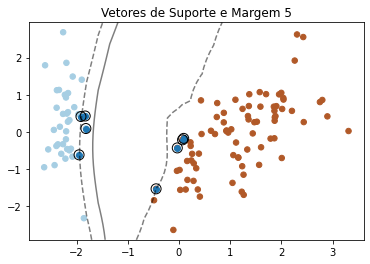

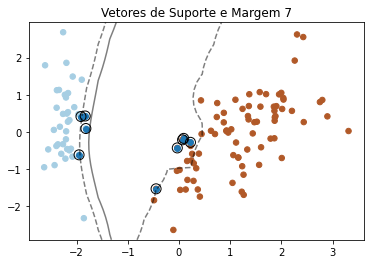

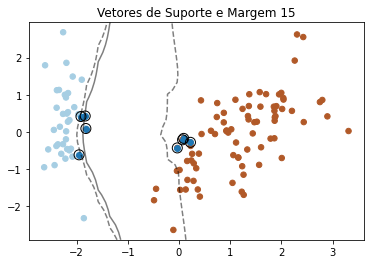

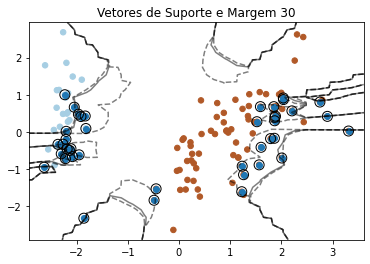

In [70]:
# Um meio de se testar os parametros
D_range = [2, 3, 5, 7, 15, 30]
acc_score = []
for d in D_range:
    svc = SVC(kernel='poly', degree=d).fit(X_train, y_train)
    acc_score.append([d, svc.score(X_test, y_test)])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1])

    # PLot da função de decisão
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Grid para visualizar as margens
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)

    # Plot das margens e decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Plot dos vetores de suporte
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title('Vetores de Suporte e Margem ' + str(d))
    plt.show()

In [71]:
acc_score

[[2, 0.9], [3, 1.0], [5, 1.0], [7, 1.0], [15, 1.0], [30, 0.9]]

### Agora com Grid Search do Sklearn

In [2]:
from sklearn.model_selection import GridSearchCV

In [73]:
# Defini-se os ranges dos parametros
param_grid = {
    'C':[0.01, 1, 100],
    'gamma':[0.1, 1, 100],
    'degree':[5, 9, 15],
    'kernel':['linear', 'rbf', 'poly']
}

In [75]:
# Instancia o GridSearch com o classificador
grid_svm = GridSearchCV(SVC(), param_grid, verbose=3)

In [76]:
# Faz-se o fit
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] C=0.01, degree=5, gamma=0.1, kernel=linear ......................
[CV]  C=0.01, degree=5, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.1, kernel=linear ......................
[CV]  C=0.01, degree=5, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.1, kernel=linear ......................
[CV]  C=0.01, degree=5, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.1, kernel=linear ......................
[CV]  C=0.01, degree=5, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.1, kernel=linear ......................
[CV]  C=0.01, degree=5, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.1, kernel=rbf .........................
[CV]  C=0.01, degree=5, gamma=0.1, kernel=rbf, score=0.708, total=   0.0s
[CV] C=0.01, degree=5, gamma=0.1, kernel=rbf ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, degree=15, gamma=0.1, kernel=poly, score=0.667, total=   0.0s
[CV] C=0.01, degree=15, gamma=0.1, kernel=poly .......................
[CV]  C=0.01, degree=15, gamma=0.1, kernel=poly, score=0.667, total=   0.0s
[CV] C=0.01, degree=15, gamma=0.1, kernel=poly .......................
[CV]  C=0.01, degree=15, gamma=0.1, kernel=poly, score=0.667, total=   0.0s
[CV] C=0.01, degree=15, gamma=1, kernel=linear .......................
[CV]  C=0.01, degree=15, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.01, degree=15, gamma=1, kernel=linear .......................
[CV]  C=0.01, degree=15, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.01, degree=15, gamma=1, kernel=linear .......................
[CV]  C=0.01, degree=15, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.01, degree=15, gamma=1, kernel=linear .......................
[CV]  C=0.01, degree=15, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.01, degree=15, gamma=1, kernel=li

[CV]  C=1, degree=9, gamma=100, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, degree=9, gamma=100, kernel=linear .........................
[CV]  C=1, degree=9, gamma=100, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, degree=9, gamma=100, kernel=linear .........................
[CV]  C=1, degree=9, gamma=100, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, degree=9, gamma=100, kernel=linear .........................
[CV]  C=1, degree=9, gamma=100, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, degree=9, gamma=100, kernel=linear .........................
[CV]  C=1, degree=9, gamma=100, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, degree=9, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=9, gamma=100, kernel=rbf, score=0.917, total=   0.0s
[CV] C=1, degree=9, gamma=100, kernel=rbf ............................
[CV]  C=1, degree=9, gamma=100, kernel=rbf, score=0.750, total=   0.0s
[CV] C=1, degree=9, gamma=100, kernel=rbf ....................

[CV]  C=100, degree=9, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=100, degree=9, gamma=1, kernel=linear .........................
[CV]  C=100, degree=9, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=100, degree=9, gamma=1, kernel=linear .........................
[CV]  C=100, degree=9, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=100, degree=9, gamma=1, kernel=linear .........................
[CV]  C=100, degree=9, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=100, degree=9, gamma=1, kernel=linear .........................
[CV]  C=100, degree=9, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=100, degree=9, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=9, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=9, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=9, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=100, degree=9, gamma=1, kernel=rbf ....................

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 1, 100], 'degree': [5, 9, 15],
                         'gamma': [0.1, 1, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [77]:
# Visualizando os melhores parametros depois do tunning
grid_svm.best_params_

{'C': 0.01, 'degree': 5, 'gamma': 0.1, 'kernel': 'linear'}

In [78]:
# Visualizando o modelo depois do tunning de hiper parametro
grid_svm.best_estimator_

SVC(C=0.01, degree=5, gamma=0.1, kernel='linear')

In [80]:
grid_svm.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

## Visualizando a superfície de decisão dos diversos kernels

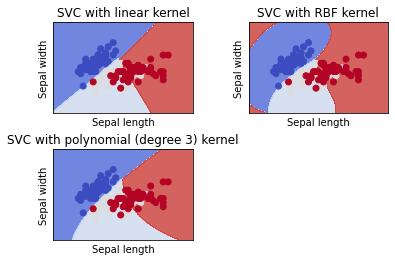

In [79]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### KFold e Cross Val Score

In [81]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

In [82]:
loadiris = datasets.load_iris(as_frame=True)
df_iris = pd.concat((pd.DataFrame(loadiris.data),pd.DataFrame(loadiris.target)), axis=1)

# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_iris.iloc[:, 0:-1].values

# pega os valores da última coluna e guarda em um vetor Y
y = df_iris.iloc[:, -1].values

In [83]:
# Instanciando nosso KFold
kf = KFold(n_splits=5, shuffle=True)

In [84]:
# Iterando dentro dos splits
kfold_score = []
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(len(X_train), len(X_test))
    svm = SVC(kernel='linear').fit(X_train, y_train)
    kfold_score.append(svm.score(X_test, y_test))

120 30
120 30
120 30
120 30
120 30


In [85]:
# Visualizando nosso resultado
kfold_score

[0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667]

In [86]:
# Pegando a média
np.array(kfold_score).mean()

0.9800000000000001

In [94]:
# Realizando a mesma tarefa agora com cross_val_score
svc = SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='f1_weighted')

In [95]:
# Scores
scores

array([1.        , 0.93265993, 1.        , 1.        , 0.86111111,
       1.        , 0.93265993, 1.        , 1.        , 1.        ])

In [96]:
# Scores média
scores.mean()

0.9726430976430975

## Exercício com o Dataset data3

In [97]:
# Importando o dataset
df_3 = pd.read_csv('datasets/data3.csv', names=['FT1', 'FT2', 'Target'])

In [98]:
df_3

,FT1,FT2,Target
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1
...,...,...,...
206,-0.399885,-0.621930,1
207,-0.124078,-0.126608,1
208,-0.316935,-0.228947,1
209,-0.294124,-0.134795,0


In [99]:
# Targets
df_3.Target.value_counts()

1    106
0    105
Name: Target, dtype: int64

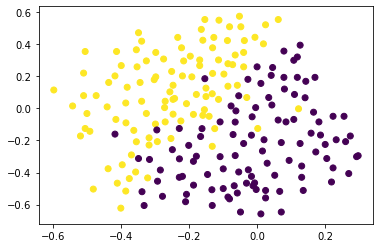

In [100]:
# Plot dos dados
plt.scatter(df_3.iloc[:,0], df_3.iloc[:,1], c=df_3.iloc[:,2])
plt.show()

In [101]:
# Parametros
param_grid = {
    'C': [0.1, 1, 10, 1000],
    'gamma': [100, 10, 1, 0.1],
    'kernel': ['linear', 'rbf']
}

In [102]:
data_svm = GridSearchCV(SVC(), param_grid, verbose=2, cv=10)

In [103]:
data_svm.fit(df_3.iloc[:,:-1], df_3.iloc[:, -1])

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] .................. C=0.1, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] .................. C=0.1, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] .................. C=0.1, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] .................. C=0.1, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] .................. C=0.1, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] .................. C=0.1, gamma=100, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=100, kernel=linear .................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........................ C=1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=10, kernel=rbf ....................................
[CV] ..................... C=1000, gamma=10, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.5s finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 1000], 'gamma': [100, 10, 1, 0.1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [104]:
data_svm.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'rbf'}

In [105]:
data_svm.best_estimator_

SVC(C=1, gamma=10)

In [106]:
data_svm.best_score_

0.9190476190476191

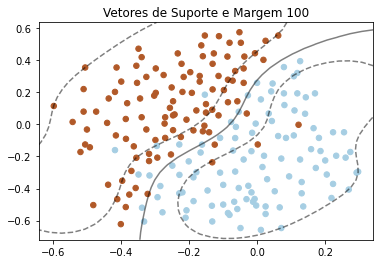

In [107]:
# Plot da superfície de divisão
plt.scatter(df_3.iloc[:, 0], df_3.iloc[:, 1], c=df_3.iloc[:,-1], s=30, cmap=plt.cm.Paired)

# PLot da função de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Grid para visualizar as margens
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Aqui colocar seu classificador
Z = data_svm.decision_function(xy).reshape(XX.shape)

# Plot das margens e decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.title('Vetores de Suporte e Margem ' + str(c))
plt.show()

In [108]:
# data3_val
df_3_val = pd.read_csv('datasets/data3_val.csv', names=['FT1', 'FT2', 'Target'])

In [109]:
df_3_val

,FT1,FT2,Target
0,-0.353062,-0.673902,0
1,-0.227126,0.447320,1
2,0.092898,-0.753524,0
3,0.148243,-0.718473,0
4,-0.001512,0.162928,0
...,...,...,...
195,0.005203,-0.544449,1
196,0.176352,-0.572454,0
197,0.127651,-0.340938,0
198,0.248682,-0.497502,0


In [110]:
# Verificando a metrica
y_pred = data_svm.predict(df_3_val.iloc[:, :-1])
print(classification_report(df_3_val.iloc[:,-1], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       113
           1       0.92      0.97      0.94        87

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



## Exercício dataset Wine ( direto do sklearn )

$ from sklearn import datasets

$ wine = datasets.load_wine()

In [111]:
# Carregando o dataset
wine = datasets.load_wine(as_frame=True)

In [112]:
wine.data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [113]:
wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [114]:
# Aplicar PCA
X = wine.data
y = wine.target

In [115]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [116]:
pca =PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [118]:
param_grid = {
    'C': [0.1, 1, 100],
    'gamma': [10, 1, 0.1],
    'degree':[3, 7],
    'kernel': ['linear', 'rbf', 'poly']
}

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [120]:
wine_svm = GridSearchCV(SVC(), param_grid, cv=10, verbose=1)

In [ ]:
wine_svm.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [3]:
# Testar métricas


In [24]:
# Verificando a metrica


## Dataset Dígitos

In [76]:
# Carregando o dataset de dígitos
d_digits = datasets.load_digits(as_frame=True)

In [77]:
d_digits

{'data':       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0           0.0        0.0        5.0       13.0        9.0        1.0   
 1           0.0        0.0        0.0       12.0       13.0        5.0   
 2           0.0        0.0        0.0        4.0       15.0       12.0   
 3           0.0        0.0        7.0       15.0       13.0        1.0   
 4           0.0        0.0        0.0        1.0       11.0        0.0   
 ...         ...        ...        ...        ...        ...        ...   
 1792        0.0        0.0        4.0       10.0       13.0        6.0   
 1793        0.0        0.0        6.0       16.0       13.0       11.0   
 1794        0.0        0.0        1.0       11.0       15.0        1.0   
 1795        0.0        0.0        2.0       10.0        7.0        0.0   
 1796        0.0        0.0       10.0       14.0        8.0        1.0   
 
       pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0        

In [78]:
df = pd.DataFrame(d_digits.data)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [79]:
# Visualização dos dados
im = df.iloc[39,:].values

In [80]:
im_r = im.reshape(8,8)

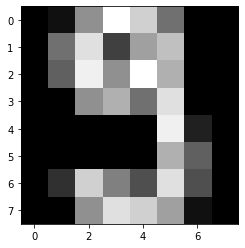

In [81]:
plt.imshow(im_r, cmap='gray')

In [82]:
d_digits.images.shape

(1797, 8, 8)

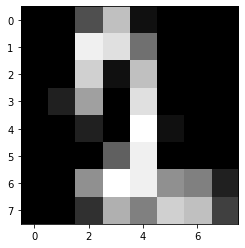

In [83]:
plt.imshow(d_digits.images[12], cmap='gray')

In [84]:
df['target'] = d_digits.target

In [85]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [98]:
# Predict sem PCA
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.2, random_state=42)

## Exercício de classificação de imagens

In [7]:
# Lendo o Dataset
files_glob = glob('./datasets/train/*.jpg')

In [8]:
len(files_glob)

800

In [9]:
# Utilizando uma CNN para extrair as características das imagens, vamos carregar o modelo
import torch
from torchvision import transforms
import torchvision.models as models
import torch.nn as nn
from PIL import Image

In [10]:
pre_trained = models.resnet18(pretrained=True)

In [11]:
pre_trained

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
feat_extractor = nn.Sequential(*list(pre_trained.children())[:-1])

In [13]:
feat_extractor

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [14]:
!nvidia-smi

Sat May 13 15:07:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 526.47       Driver Version: 526.47       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0    N/A /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
device

'cuda'

In [17]:
feat_extractor.to(device)
feat_extractor.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [18]:
# Transformando a imagem em um tensor
im = Image.open(files_glob[24])

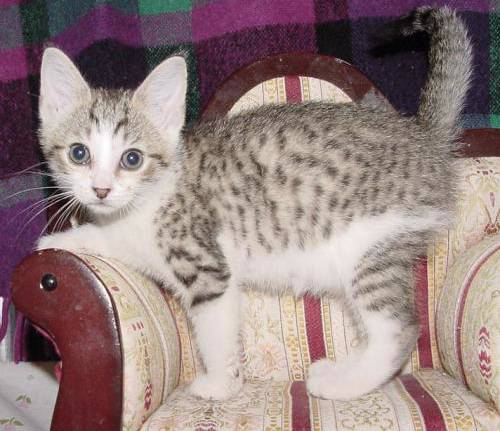

In [19]:
im

In [20]:
np.array(im).shape

(431, 500, 3)

In [21]:
transform_image = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((224,224)),
     transforms.Normalize((0.485, 0.456, 0.406),
                          (0.229, 0.224, 0.225))])

In [22]:
im_trans = transform_image(im)

In [23]:
im_trans.size()

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


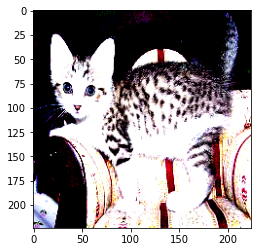

In [24]:
plt.imshow(im_trans.permute((1,2,0)))
plt.show()

In [25]:
# Extraindo as caracteristicas da imagem
arr = feat_extractor(im_trans.unsqueeze(0).to(device))

In [26]:
arr.size()

torch.Size([1, 512, 1, 1])

In [27]:
arr = torch.reshape(arr, (1, 512))

In [28]:
arr.size()

torch.Size([1, 512])

In [29]:
arr

tensor([[4.0542e-01, 9.2202e-01, 2.9082e+00, 1.5657e+00, 2.5350e-01, 4.0785e-01,
         2.9715e-01, 3.0269e-01, 1.1736e+00, 1.1833e+00, 1.9096e+00, 1.2443e-01,
         8.9238e-01, 4.9453e-01, 1.6919e-01, 1.5219e+00, 2.4578e-01, 6.3256e-01,
         1.7300e-02, 8.9373e-01, 8.9086e-01, 5.9033e-01, 4.3796e-01, 5.8612e-01,
         6.8249e-01, 1.3642e+00, 1.2444e-01, 5.3918e-01, 3.1266e-01, 6.7862e-01,
         1.3150e-01, 4.3443e-01, 5.0781e-02, 8.1385e-01, 4.7238e-01, 2.3794e+00,
         1.0928e+00, 7.7653e-01, 8.9067e-01, 9.2706e-01, 2.8677e-01, 6.3611e-01,
         1.4250e-01, 1.1849e+00, 5.3910e-01, 3.1206e-01, 3.8085e-01, 2.4027e+00,
         8.0623e-01, 2.1505e-01, 2.1331e-01, 1.3679e+00, 4.7889e-01, 9.4563e-01,
         6.2439e-01, 1.3413e+00, 2.2964e-01, 8.6514e-01, 1.7557e-01, 5.2086e-03,
         1.4573e-01, 2.1617e-01, 2.0000e-01, 1.1469e+00, 2.0433e+00, 6.9444e-01,
         5.9685e-01, 1.4808e+00, 8.8018e-01, 2.1393e-01, 1.8365e+00, 3.0009e-01,
         7.7685e-01, 9.2909e

In [32]:
files_glob[24].split('\\')[-1]

'cat.11200.jpg'

In [33]:
if 'dog' in files_glob[24].split('\\')[-1]:
    print('True')
else:
    print('False')

False


In [34]:
# Gerar dataset
df_list = list()
for im in tqdm(files_glob):
    if 'dog' in im.split('\\')[-1]:
        label = 1
    else:
        label = 0
    img = Image.open(im)
    img_t = transform_image(img)
    arr = feat_extractor(img_t.unsqueeze(0).to(device))
    arr = torch.reshape(arr, (1, 512))
    
    df_list.append({'image': im.split('\\')[-1],
                    'target': label,
                    'features': arr.detach().cpu().numpy()
                   })
    
df_imgs = pd.DataFrame(df_list)

In [35]:
df_imgs

,image,target,features
0,cat.0.jpg,0,"[[0.9988315, 1.0722902, 1.3858391, 1.4439088, ..."
1,cat.1.jpg,0,"[[0.2873158, 0.5717833, 1.8654492, 1.320506, 0..."
2,cat.10.jpg,0,"[[0.007424514, 1.2838523, 1.7129409, 1.081687,..."
3,cat.100.jpg,0,"[[0.43994364, 0.66446155, 1.9457573, 0.9187093..."
4,cat.101.jpg,0,"[[0.41493267, 0.58923805, 1.3158641, 2.2434816..."
...,...,...,...
795,dog.95.jpg,1,"[[5.1282244, 1.3508459, 0.4980353, 1.141714, 0..."
796,dog.96.jpg,1,"[[0.0077843624, 1.0992144, 1.08945, 0.09992098..."
797,dog.97.jpg,1,"[[0.26431203, 0.08367926, 0.67556745, 0.343801..."
798,dog.98.jpg,1,"[[2.4083536, 0.31385514, 1.4411577, 0.1745272,..."


In [36]:
X = [x.tolist()[0] for x in df_imgs['features'].values]

In [38]:
X = np.array(X)

In [40]:
X.shape

(800, 512)

In [41]:
y = df_imgs.target.values

In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [45]:
classifier.score(X_test, y_test)

0.98125

In [46]:
# Fazer uma série de predicts no teste para verificar com o resultado
# Recomendação, trabalhar a saída para colocar uma string em vez de int ( Gato ou Cachorro )
files_val = glob('./datasets/val/*.jpg')

In [47]:
len(files_val)

200

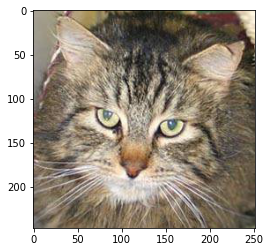

A IA falou que é um gato

#####################


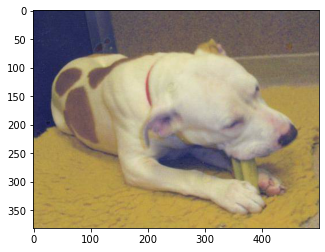

A IA falou que é um cachorro

#####################


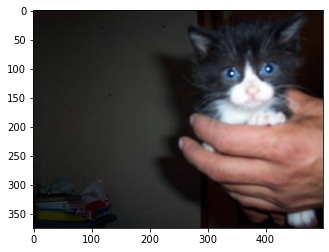

A IA falou que é um gato

#####################


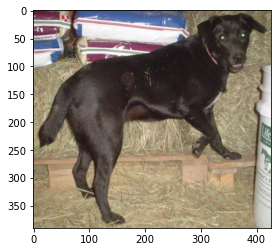

A IA falou que é um cachorro

#####################


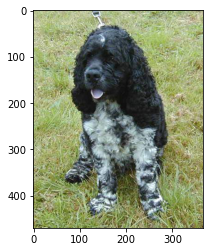

A IA falou que é um cachorro

#####################


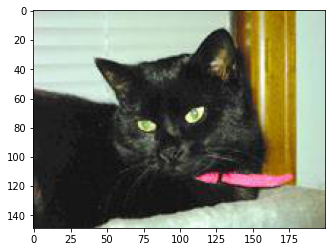

A IA falou que é um gato

#####################


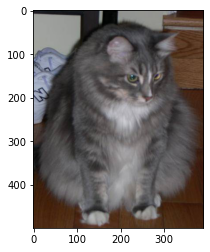

A IA falou que é um gato

#####################


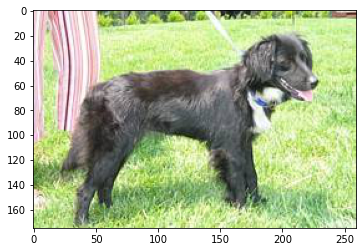

A IA falou que é um cachorro

#####################


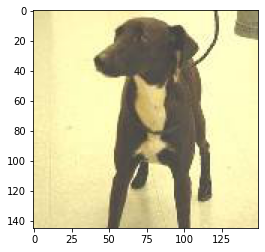

A IA falou que é um cachorro

#####################


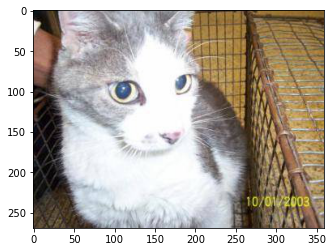

A IA falou que é um gato

#####################


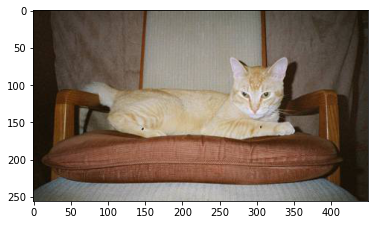

A IA falou que é um gato

#####################


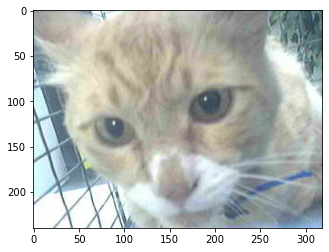

A IA falou que é um gato

#####################


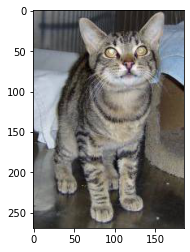

A IA falou que é um gato

#####################


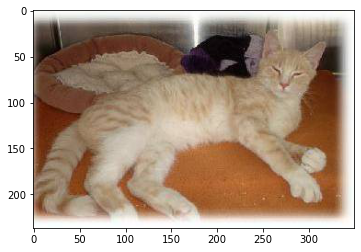

A IA falou que é um gato

#####################


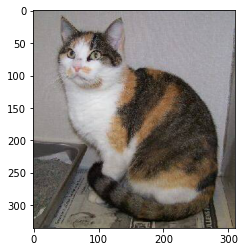

A IA falou que é um gato

#####################


In [49]:
for i in range(15):
    choice = np.random.choice(range(200))
    img = Image.open(files_val[choice])
    img_t = transform_image(img)
    arr = feat_extractor(img_t.unsqueeze(0).to(device))
    arr = torch.reshape(arr, (1, 512))
    
    pred = classifier.predict(arr.detach().cpu().numpy())
    
    plt.imshow(img)
    plt.show()
    
    if pred == 1:
        print('A IA falou que é um cachorro')
    else:
        print('A IA falou que é um gato')
    print('\n#####################')

## Exercício com o dataset Breast Câncer do Sklearn